# Dataset Setup

___
## Imports

In [39]:
import kagglehub
import shutil
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import random
import textwrap


___
## Downloading Dataset

In [ ]:
# Download latest version
source_folder = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", source_folder)

# Path to the destination folder
destination_folder = "data"

# Check if the destination folder exists
if os.path.exists(destination_folder):
    # Ask the user if they want to overwrite the existing folder
    user_input = input(f"The destination folder {destination_folder} already exists. Do you want to overwrite it? (yes/no): ")
    if user_input.lower() == "yes":
        # Remove the existing folder
        shutil.rmtree(destination_folder)
        # Copy the source folder to the destination folder
        shutil.copytree(source_folder, destination_folder)
        print(f"The folder {source_folder} has been copied to {destination_folder}")
    else:
        print("Operation cancelled.")
else:
    # Copy the source folder to the destination folder
    shutil.copytree(source_folder, destination_folder)
    print(f"The folder {source_folder} has been copied to {destination_folder}")


Le dossier C:\Users\justi\.cache\kagglehub\datasets\adityajn105\flickr8k\versions\1 a été copié dans data


___
## Data Exploration

In [26]:
image_folder = "data/Images" # Path to the folder containing images
captions_file = "data/captions.txt" # Path to the captions file

Number of images: 8091
Max width: 500, Min width: 164, Mean width: 457.87220368310466
Max height: 500, Min height: 127, Mean height: 397.25188481028306


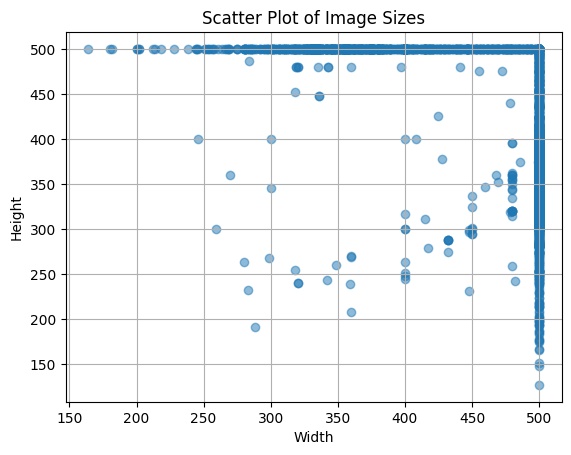

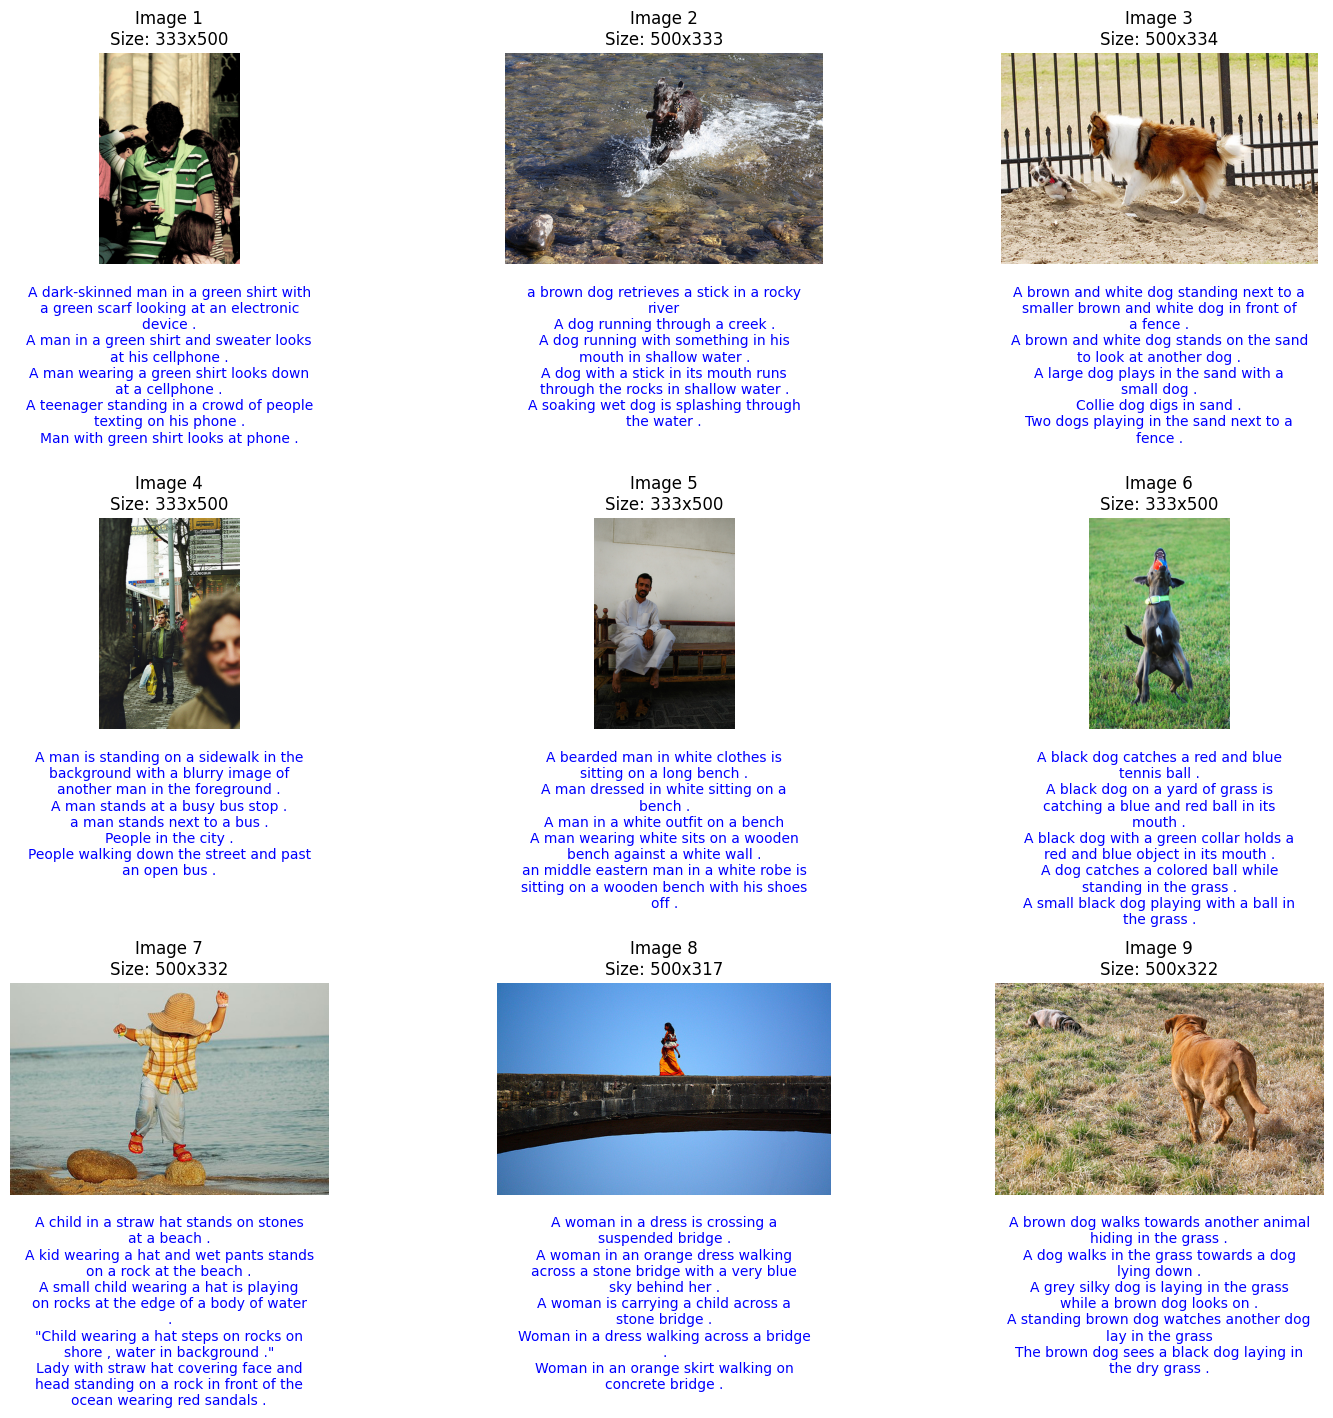

In [42]:
def explore_dataset(image_folder: str, captions_file: str):
    # Read the captions file
    captions = {}
    with open(captions_file, 'r') as file:
        for line in file:
            image_name, caption = line.strip().split(',', 1)
            if image_name not in captions:
                captions[image_name] = []
            captions[image_name].append(caption)

    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    # Check if there are at least 9 images in the folder
    if len(image_files) < 9:
        print("Not enough images in the folder to create a 3x3 subplot.")
    else:
        # Select 9 random images
        selected_images = random.sample(image_files, 9)

        # Create a 3x3 subplot
        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        axes = axes.flatten()

        # Display the selected images
        for i, image_file in enumerate(selected_images):
            image_path = os.path.join(image_folder, image_file)
            with Image.open(image_path) as img:
                width, height = img.size
                axes[i].imshow(img)
                axes[i].set_title(f"Image {i+1}\nSize: {width}x{height}")
                axes[i].axis('off')

                # Add captions to the subplot with text wrapping
                if image_file in captions:
                    wrapped_captions = [textwrap.fill(caption, width=40) for caption in captions[image_file]]
                    caption_text = "\n".join(wrapped_captions)
                    axes[i].text(0.5, -0.1, caption_text, ha='center', va='top', transform=axes[i].transAxes, fontsize=10, color='blue')

        # Adjust layout
        plt.tight_layout()
        plt.subplots_adjust(hspace=1.2, bottom=0.2)  # Increase hspace for more vertical space and bottom space for captions
        plt.show()

explore_dataset(image_folder, captions_file)

___
## Padding Images

As we can observe the images have different sizes. It is important to have an homogeneous dataset in terms of image dimensions so we will pad the images so that they all have the same dimension as the largest image (500 $\times$ 500).

In [44]:
def pad_images(input_folder, output_folder, target_size, padding_color=(0, 0, 0)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(os.path.join(input_folder, filename))

            # Calculate the padding needed for width and height
            delta_width = target_size[0] - img.size[0]
            delta_height = target_size[1] - img.size[1]
            padding = (delta_width // 2, delta_height // 2, delta_width - (delta_width // 2), delta_height - (delta_height // 2))

            # Add padding
            img_padded = ImageOps.expand(img, padding, fill=padding_color)
            img_padded.save(os.path.join(output_folder, filename))
        

target_size = (max_width, max_height)
image_folder_2 = "data/Images_homogeneous"
pad_images(image_folder, image_folder_2, target_size)

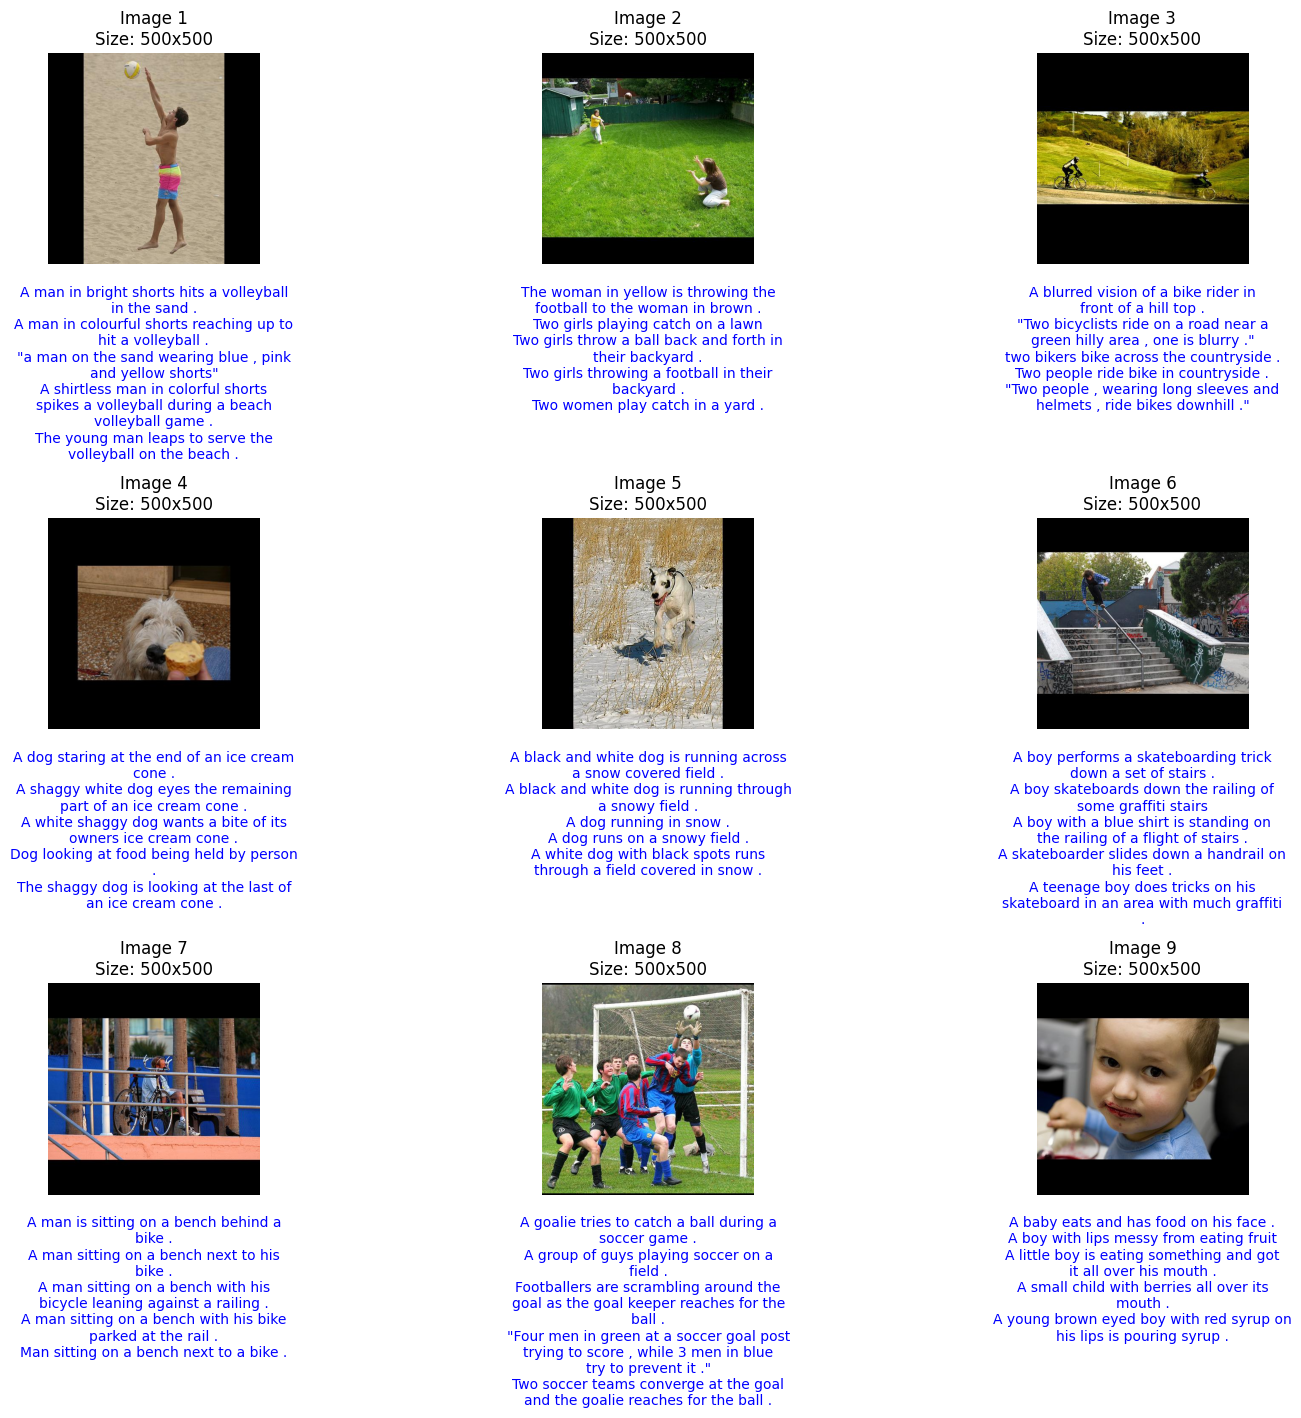

In [45]:
explore_dataset(image_folder_2, captions_file)